# Objective
The main objective of this project, "Loan Prediction Based on Customer Behavior," is to develop predictive models and analyses that leverage customer behavior and financial attributes to assess and predict the risk of loan defaults.

In [1]:
# Importing Necessary Libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Loading the Data

In [2]:
# Reading the CSV file

df = pd.read_csv("Training Data.csv")

In [3]:
df


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
# Printing the shape of the data
rows, columns = df.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 252000
Columns: 13


In [5]:
# Info the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
# describing the data
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# 2. Data Cleaning

In [7]:
df.isnull().sum()  # finding out the null values


Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [8]:
df.duplicated().sum() # finding Out any duplicates


0

In [9]:
# Remove the unwanted columns 

In [10]:
df=df.drop(columns=["Id"], axis=0)
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [11]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [12]:
# convert the all columns name in lower case

df.columns = df.columns.str.lower()
df.columns


Index(['income', 'age', 'experience', 'married/single', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object')

In [13]:
df.state.unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [14]:
df.city.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [15]:
# clean and extract alphabetical portions from the 'city' and 'state' columns of the DataFrame
df.city = df.city.str.extract("([A-Za-z]+)")
df.state = df.state.str.extract("([A-Za-z]+)")

In [16]:
df.city 

0                    Rewa
1                Parbhani
2               Alappuzha
3             Bhubaneswar
4         Tiruchirappalli
               ...       
251995            Kolkata
251996               Rewa
251997             Kalyan
251998        Pondicherry
251999              Avadi
Name: city, Length: 252000, dtype: object

In [17]:
df.state

0              Madhya
1         Maharashtra
2              Kerala
3              Odisha
4               Tamil
             ...     
251995           West
251996         Madhya
251997    Maharashtra
251998     Puducherry
251999          Tamil
Name: state, Length: 252000, dtype: object

### Convert Categorical Data to Numeric

In [18]:
df['married/single'].unique()


array(['single', 'married'], dtype=object)

In [19]:
# convert Married/Single column to numeric
df['married/single'] = df['married/single'].map({'single': 0, 'married': 1})

In [20]:
df['married/single'].head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: married/single, dtype: int64

In [22]:
df['house_ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [23]:
df['car_ownership'].unique()


array(['no', 'yes'], dtype=object)

In [24]:
# convert car_ownership column to numeric
df['car_ownership'] = df['car_ownership'].map({'no': 0, 'yes': 1})

In [25]:
df['car_ownership']

0         0
1         0
2         0
3         1
4         0
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: car_ownership, Length: 252000, dtype: int64

In [26]:
df # In married/single column single=0, married = 1. In house_ownership 'norent_noown': 0, 'rented': 1, 'owned': 2 column. In  car_ownership column 'no': 0, 'yes': 1 


,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,0,rented,0,Mechanical_engineer,Rewa,Madhya,3,13,0
1,7574516,40,10,0,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,1,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,0,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,0,rented,0,Civil_servant,Tiruchirappalli,Tamil,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,rented,0,Surgeon,Kolkata,West,6,11,0
251996,2843572,26,10,0,rented,0,Army_officer,Rewa,Madhya,6,11,0
251997,4522448,46,7,0,rented,0,Design_Engineer,Kalyan,Maharashtra,7,12,0
251998,6507128,45,0,0,rented,0,Graphic_Designer,Pondicherry,Puducherry,0,10,0


 # 3. EDA

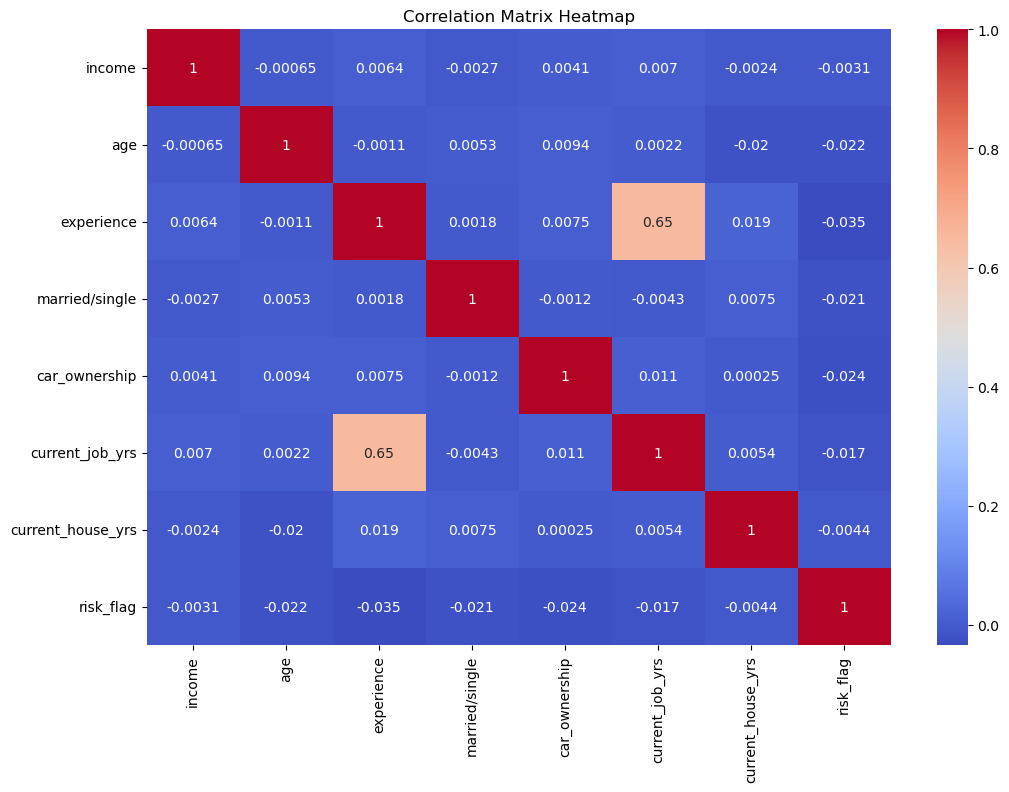

In [27]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [28]:
professions_count = df["profession"].value_counts()
professions_count # count the each professions in the dataset

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

### 3.1. Finding out the top 15 professions

In [31]:
top_professions=professions_count.head(15)

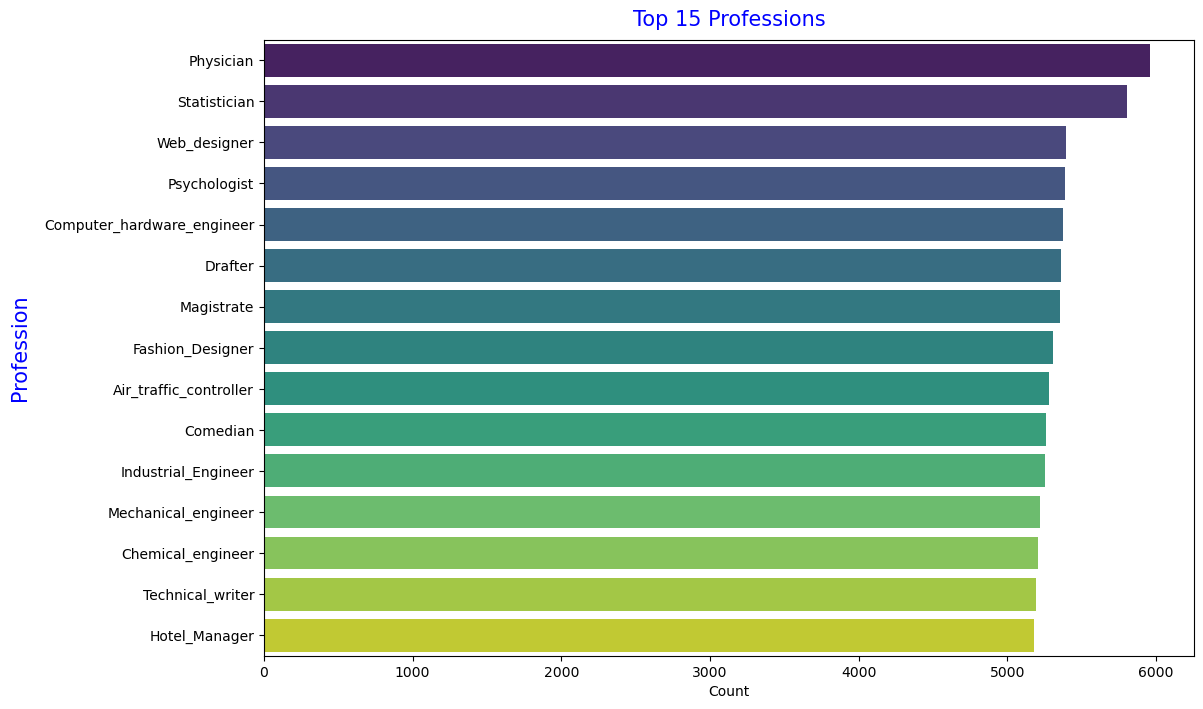

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x=top_professions.values, y=top_professions.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Profession', labelpad=10, size =15, c="blue" )
plt.title('Top 15 Professions', pad=10, size =15, c="blue")
plt.show()

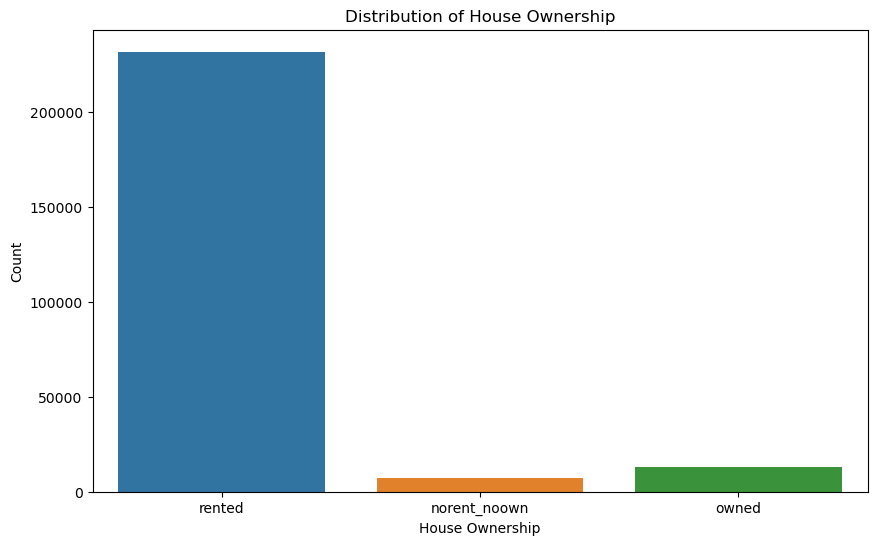

In [34]:
# Create a countplot for 'house_ownership'.
plt.figure(figsize=(10, 6))
sns.countplot(x='house_ownership', data=df)
plt.xlabel('House Ownership')
plt.ylabel('Count')
plt.title('Distribution of House Ownership')
plt.show()

In the above graph we can observe that rental individuals are higher compaire to the two other categories

### 3.2. How is house ownership related to  risk flag?

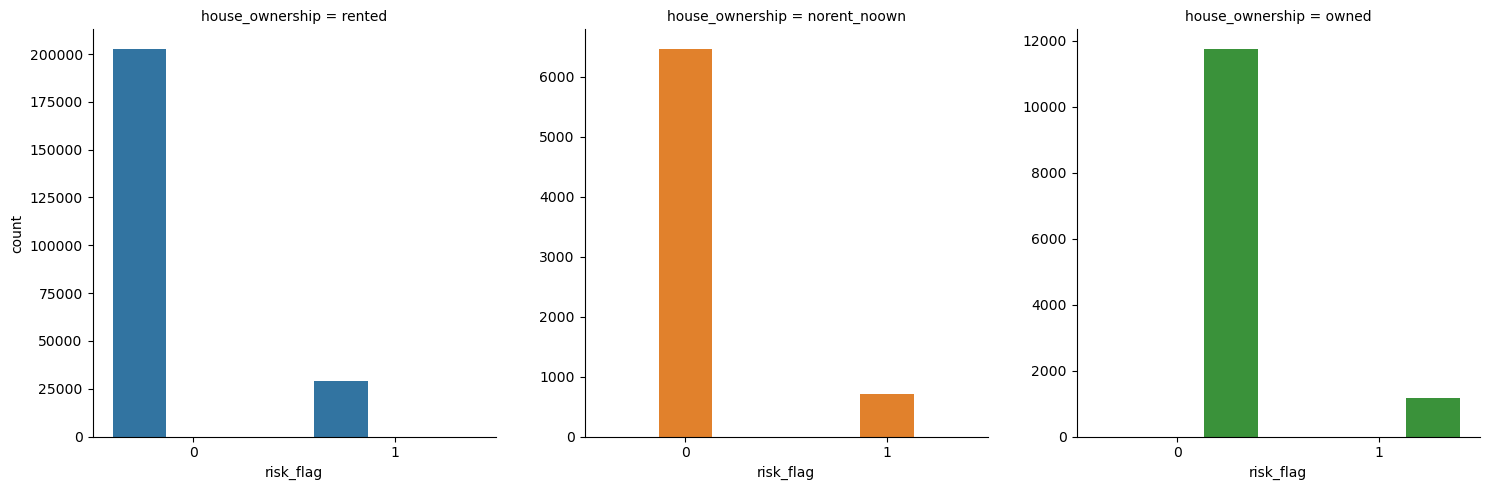

In [37]:
sns.catplot(x='risk_flag',data=df, col='house_ownership',kind='count',sharey=False,hue='house_ownership')
#plt.legend(labels=['norent_noown: 0', 'rented: 1', 'owned: 2'], title='House Ownership')
plt.show()

We can see from the charts above that renters have the highest risk of defaulting while people that own properties are less likely to default.

### 3.3. Find out how many individuals are married and how many are single in the dataset

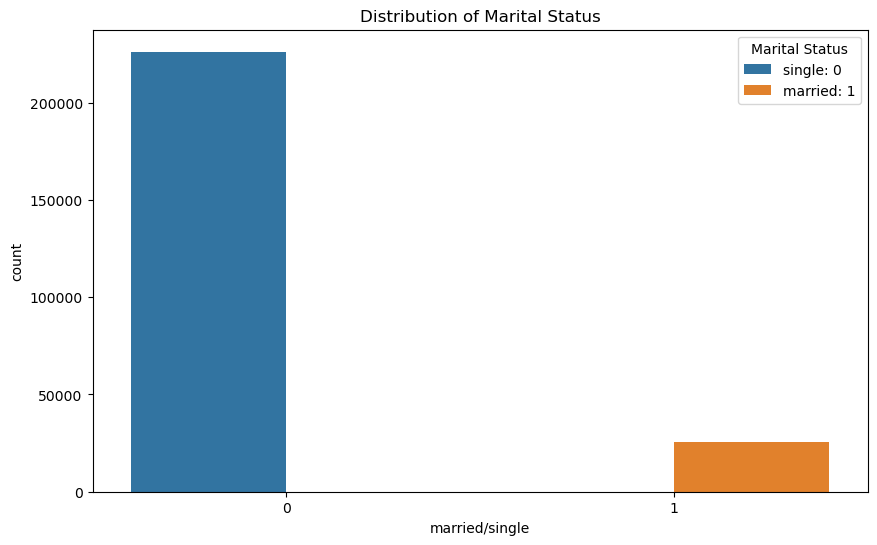

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='married/single', data=df, hue='married/single')
plt.title('Distribution of Marital Status')
plt.legend(labels=['single: 0', 'married: 1'], title='Marital Status')
plt.show()

### 3.4. How is  Marital Status related to  risk flag?

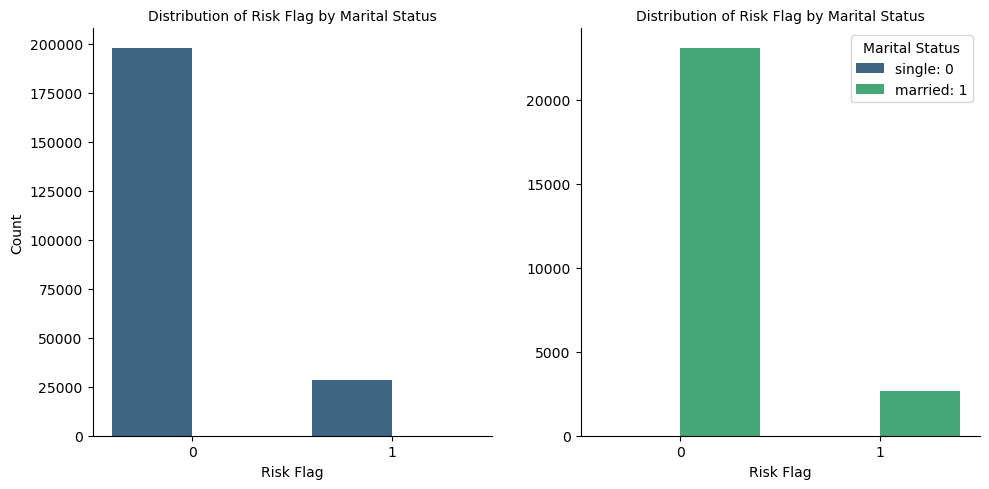

In [39]:
g = sns.catplot(x='risk_flag', data=df, col='married/single', kind='count', sharey=False, hue='married/single', palette='viridis')
g.set_axis_labels('Risk Flag', 'Count')
g.set_titles('Distribution of Risk Flag by Marital Status')
# Add a legend for 'married/single'
plt.legend(labels=['single: 0', 'married: 1'], title='Marital Status')
plt.show()


We can observe that the low risk facto                    r  among married individuals is lower than the single individuals.

### 3.5. Identify the profession with the highest income in the dataset.



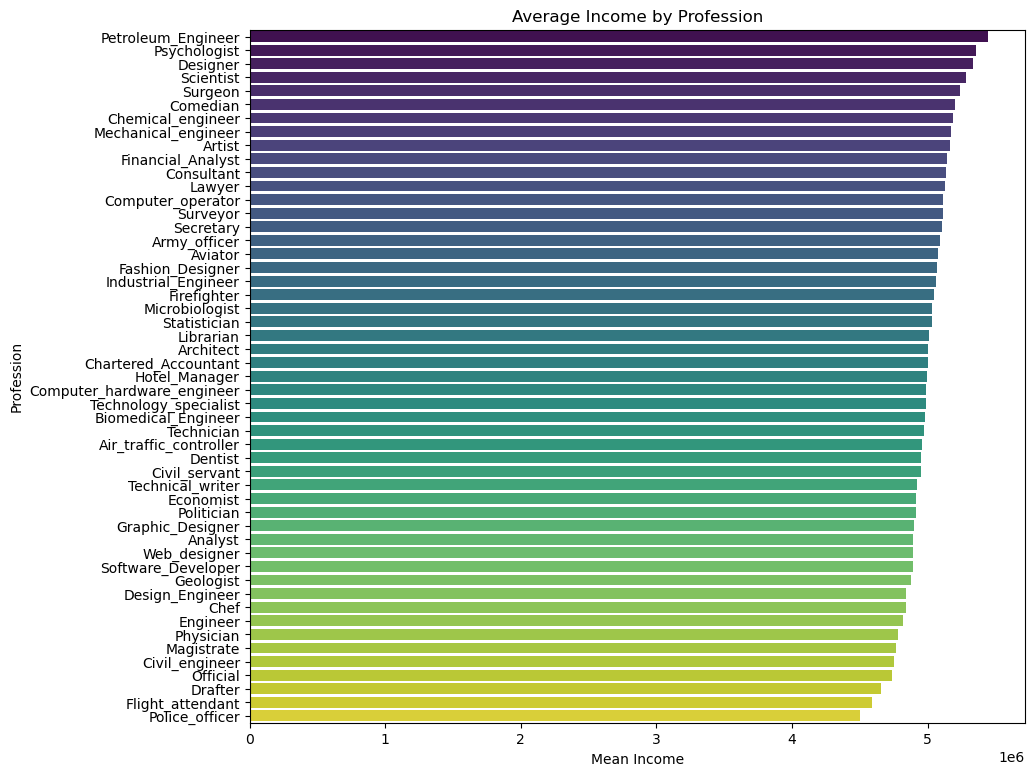

In [40]:

# Group the data by 'Profession' and calculate the mean income for each profession
income_by_profession = df.groupby('profession')['income'].mean().reset_index()
income_by_profession = income_by_profession.sort_values(by='income', ascending=False)
plt.figure(figsize=(10, 9))
sns.barplot(x='income', y='profession', data=income_by_profession, palette='viridis')
plt.xlabel('Mean Income')
plt.ylabel('Profession')
plt.title('Average Income by Profession')
plt.show()

In [41]:
df.risk_flag.value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

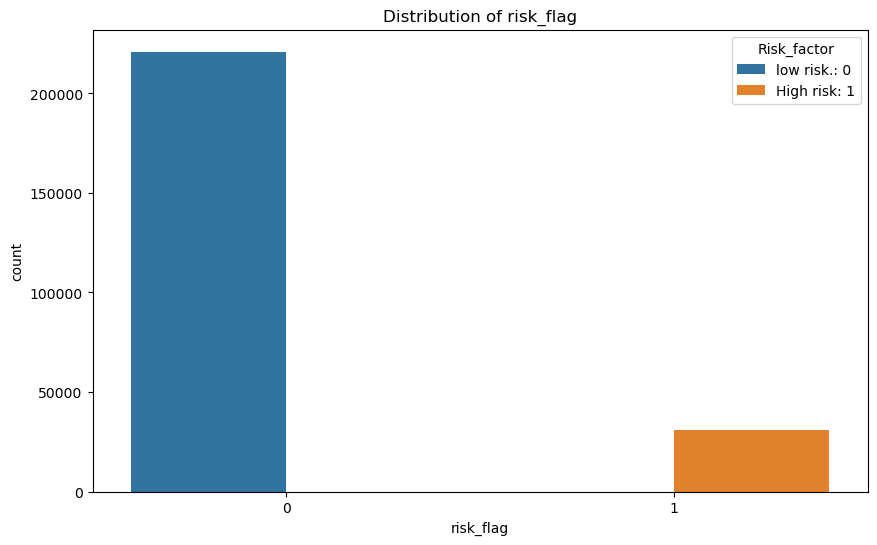

In [42]:

plt.figure(figsize=(10, 6))
sns.countplot(x='risk_flag', data=df, hue='risk_flag')
plt.title('Distribution of risk_flag')
plt.legend(labels=['low risk.: 0', 'High risk: 1'], title='Risk_factor')
plt.show()

In the dataset, the "risk_flag" column contains significantly more 0 values (221,004) than 1 values (30,996). This class imbalance indicates that the dataset is unbalanced, as one class (0) greatly outnumbers the other class (1).

### 3.6. RandomOverSampler

The  RandomOverSampler is used to balance the class distribution by increasing the number of instances in the minority class through random duplication.

In [43]:
X = df.drop("risk_flag",axis = 1)
y = df["risk_flag"]
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
X,y=sm.fit_resample(X,y)

Text(0.5, 1.0, 'Distribution of Resampled "y" Data')

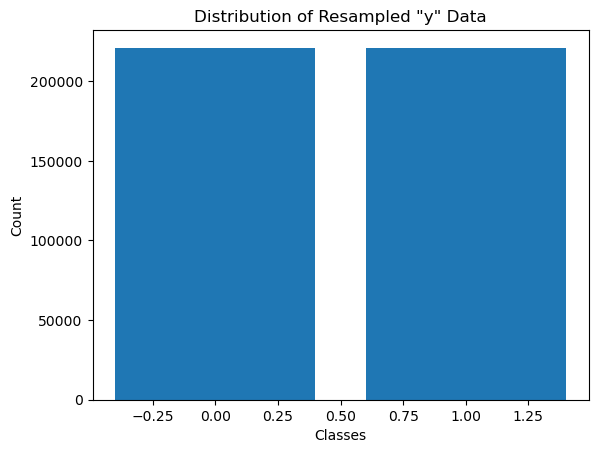

In [44]:

y = pd.Series(y)
value_counts = y.value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Resampled "y" Data')

In [45]:
y.value_counts()

0    221004
1    221004
Name: risk_flag, dtype: int64